## `Import Statements`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pycaret 
import uvicorn
import fastapi
import pycaret
import numpy
import pandas
import joblib
import sklearn

### Packages' Version

In [2]:
# List of package names
package_dict = {'Package' : ['fastapi', 'joblib', 'numpy', 'pandas', 'pycaret', 'sklearn', 'uvicorn']}

# Corresponding package versions
version_dict = {'Version' : [f'{fastapi.__version__}',
                              f'{joblib.__version__}',
                              f'{numpy.__version__}',
                              f'{pandas.__version__}',
                              f'{pycaret.__version__}',
                              f'{sklearn.__version__}',
                              f'{uvicorn.__version__}']}

# Create DataFrame using both dictionaries
version_df = pd.DataFrame({**package_dict, **version_dict})

version_df

Package  Version
0  fastapi  0.115.5
1   joblib    1.3.2
2    numpy   1.24.3
3   pandas    2.0.3
4  pycaret    3.2.0
5  sklearn    1.2.2
6  uvicorn   0.32.0

## Load the Data

In [3]:
df = pd.read_csv('./boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


## Preliminary Data Exploration

In [ ]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [ ]:

def PreliminaryDataExploration(data):
    print(f'1. The shape of the dataset:\n{data.shape}\n')
    print(f'2. Columns name:\n{data.columns.values}\n')
    print(f'3. Are there null values?\n{data.isna().values.any()}\n')
    print(f'4. Are there any duplicates?\n{data.duplicated().values.any()}\n')
    print(f'5. Types of the columns?\n{data.dtypes}')
    

PreliminaryDataExploration(df)

1. The shape of the dataset:
(506, 14)

2. Columns name:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'PRICE']

3. Are there null values?
False

4. Are there any duplicates?
False

5. Types of the columns?
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


In [ ]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Descriptive Statistics

* What is the average price of a home in the dataset?

In [ ]:
df.PRICE.mean()*1000

22532.806324110676

* How many students are there per teacher on average?

In [ ]:
df.PTRATIO.sum()

9338.5

* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [ ]:
df.RM.max()

8.78

In [ ]:
df.RM.min()

3.561

## Visualise the Features

Having looked at some descriptive statistics, visualise the data for the model. Use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 

Setting the `aspect` parameter to `2` for a better picture. 

#### `House Prices` 💰

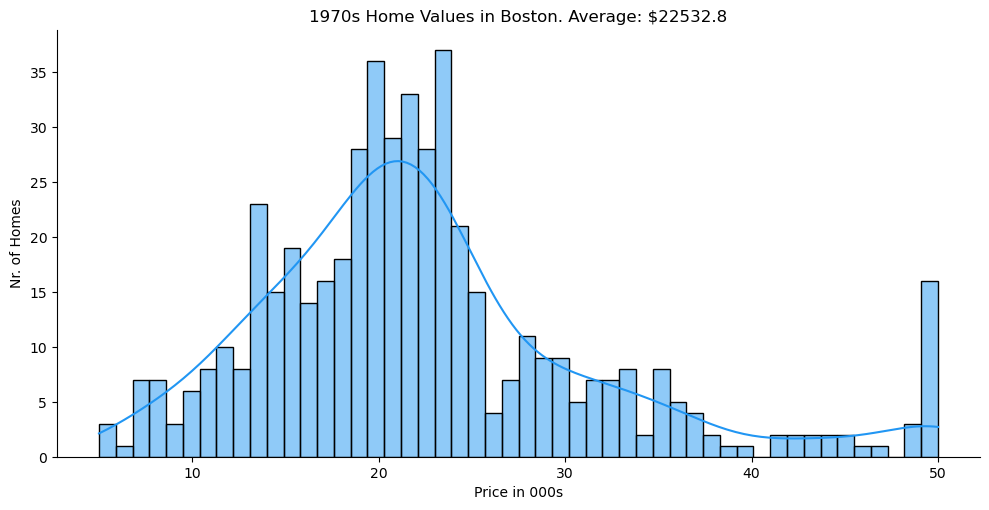

In [ ]:
sns.displot(df['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*df.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

Note there is a spike in the number homes at the very right tail at the $50,000 mark. 🤔

#### Distance to Employment - Length of Commute 🚗

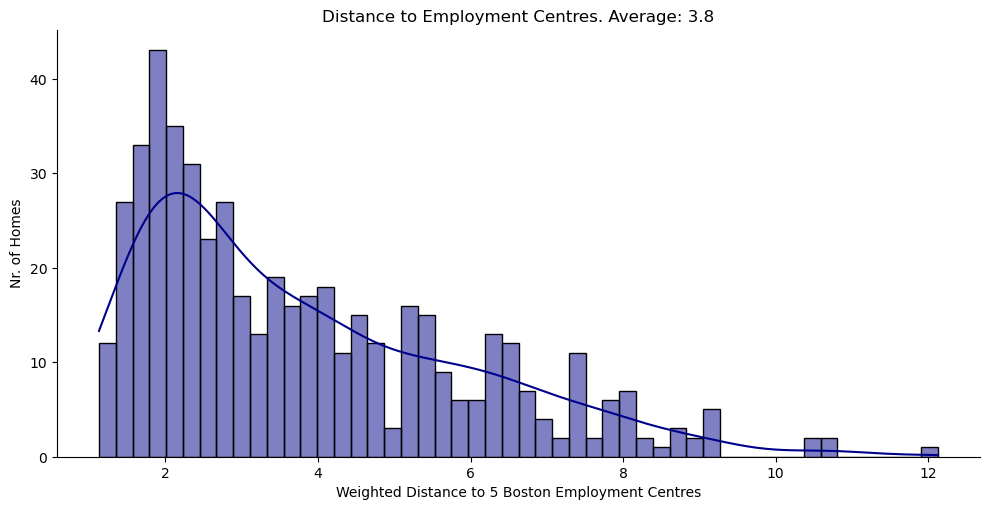

In [ ]:
sns.displot(df.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(df.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

#### Number of Rooms

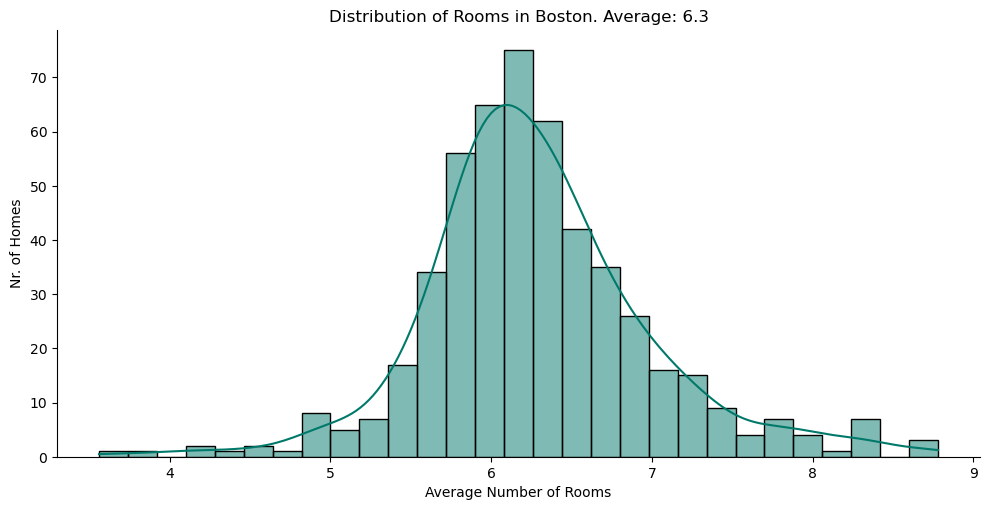

In [ ]:
sns.displot(df.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {df.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 🛣

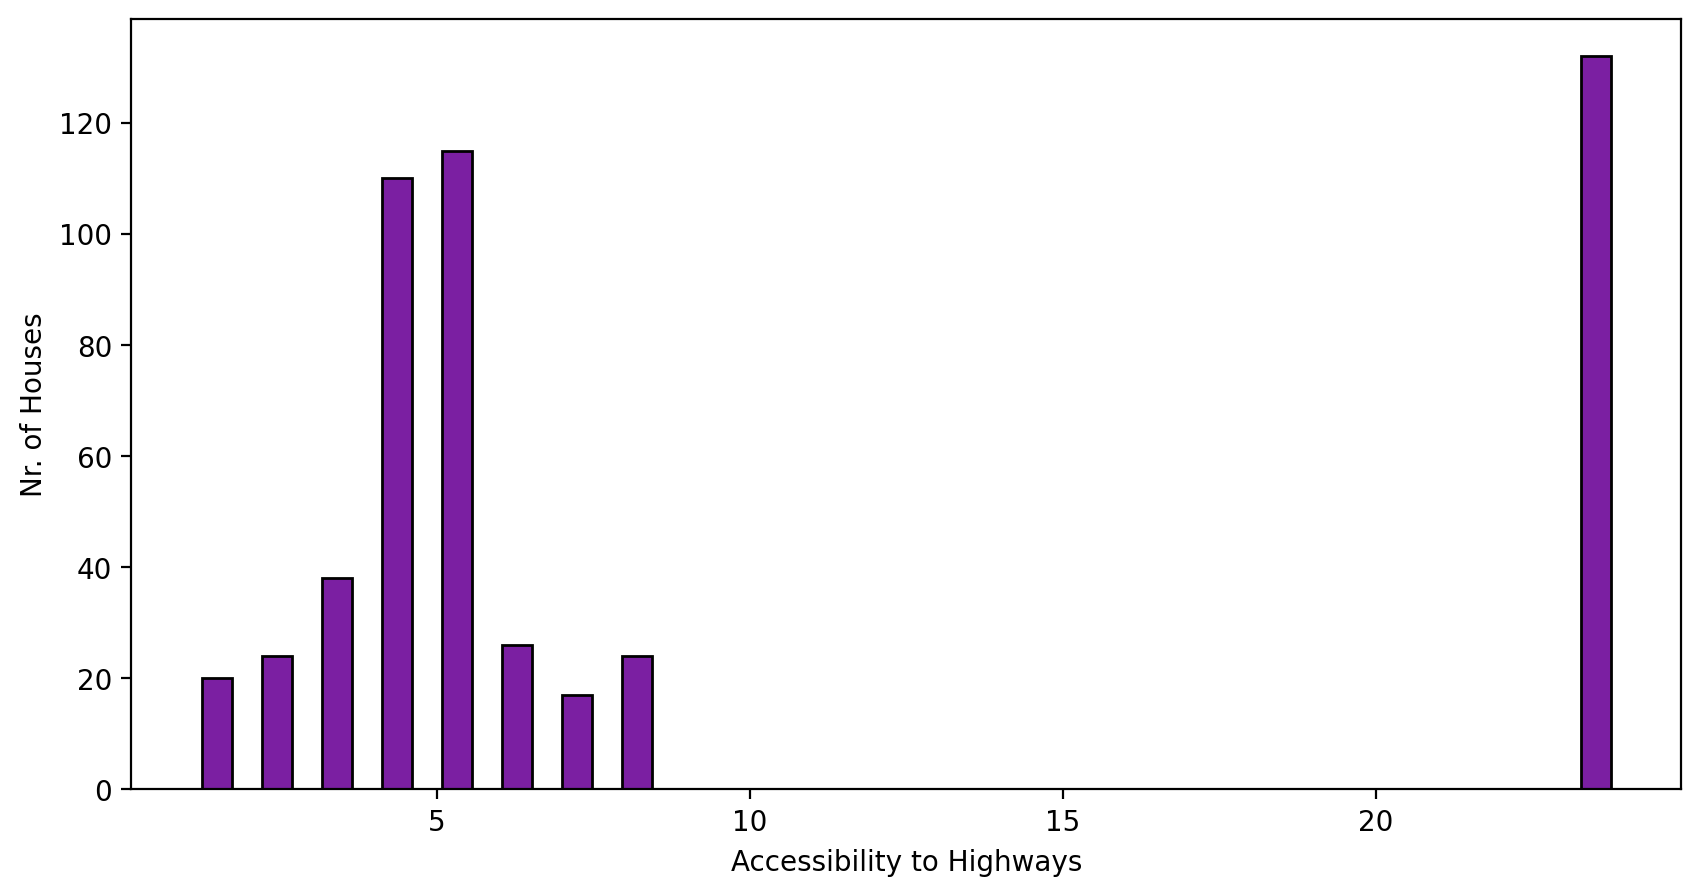

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(df['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

#### Next to the River? ⛵️

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it.

In [ ]:
river_access = df['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

Note that out of the total number of 506 homes, only 35 are located next to the Charles River. 

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

In [ ]:
scatter = px.scatter(df, x='PRICE', y='CHAS', color='CHAS', color_continuous_scale='Bluered_r')

scatter.show()

# Understand the Relationships in the Data

### Run a Pair Plot

There might be some relationships in the data that we should know about. Before running the code, make some predictions:

* What to expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship to expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check the intuition regarding the questions above on the `pairplot`. 

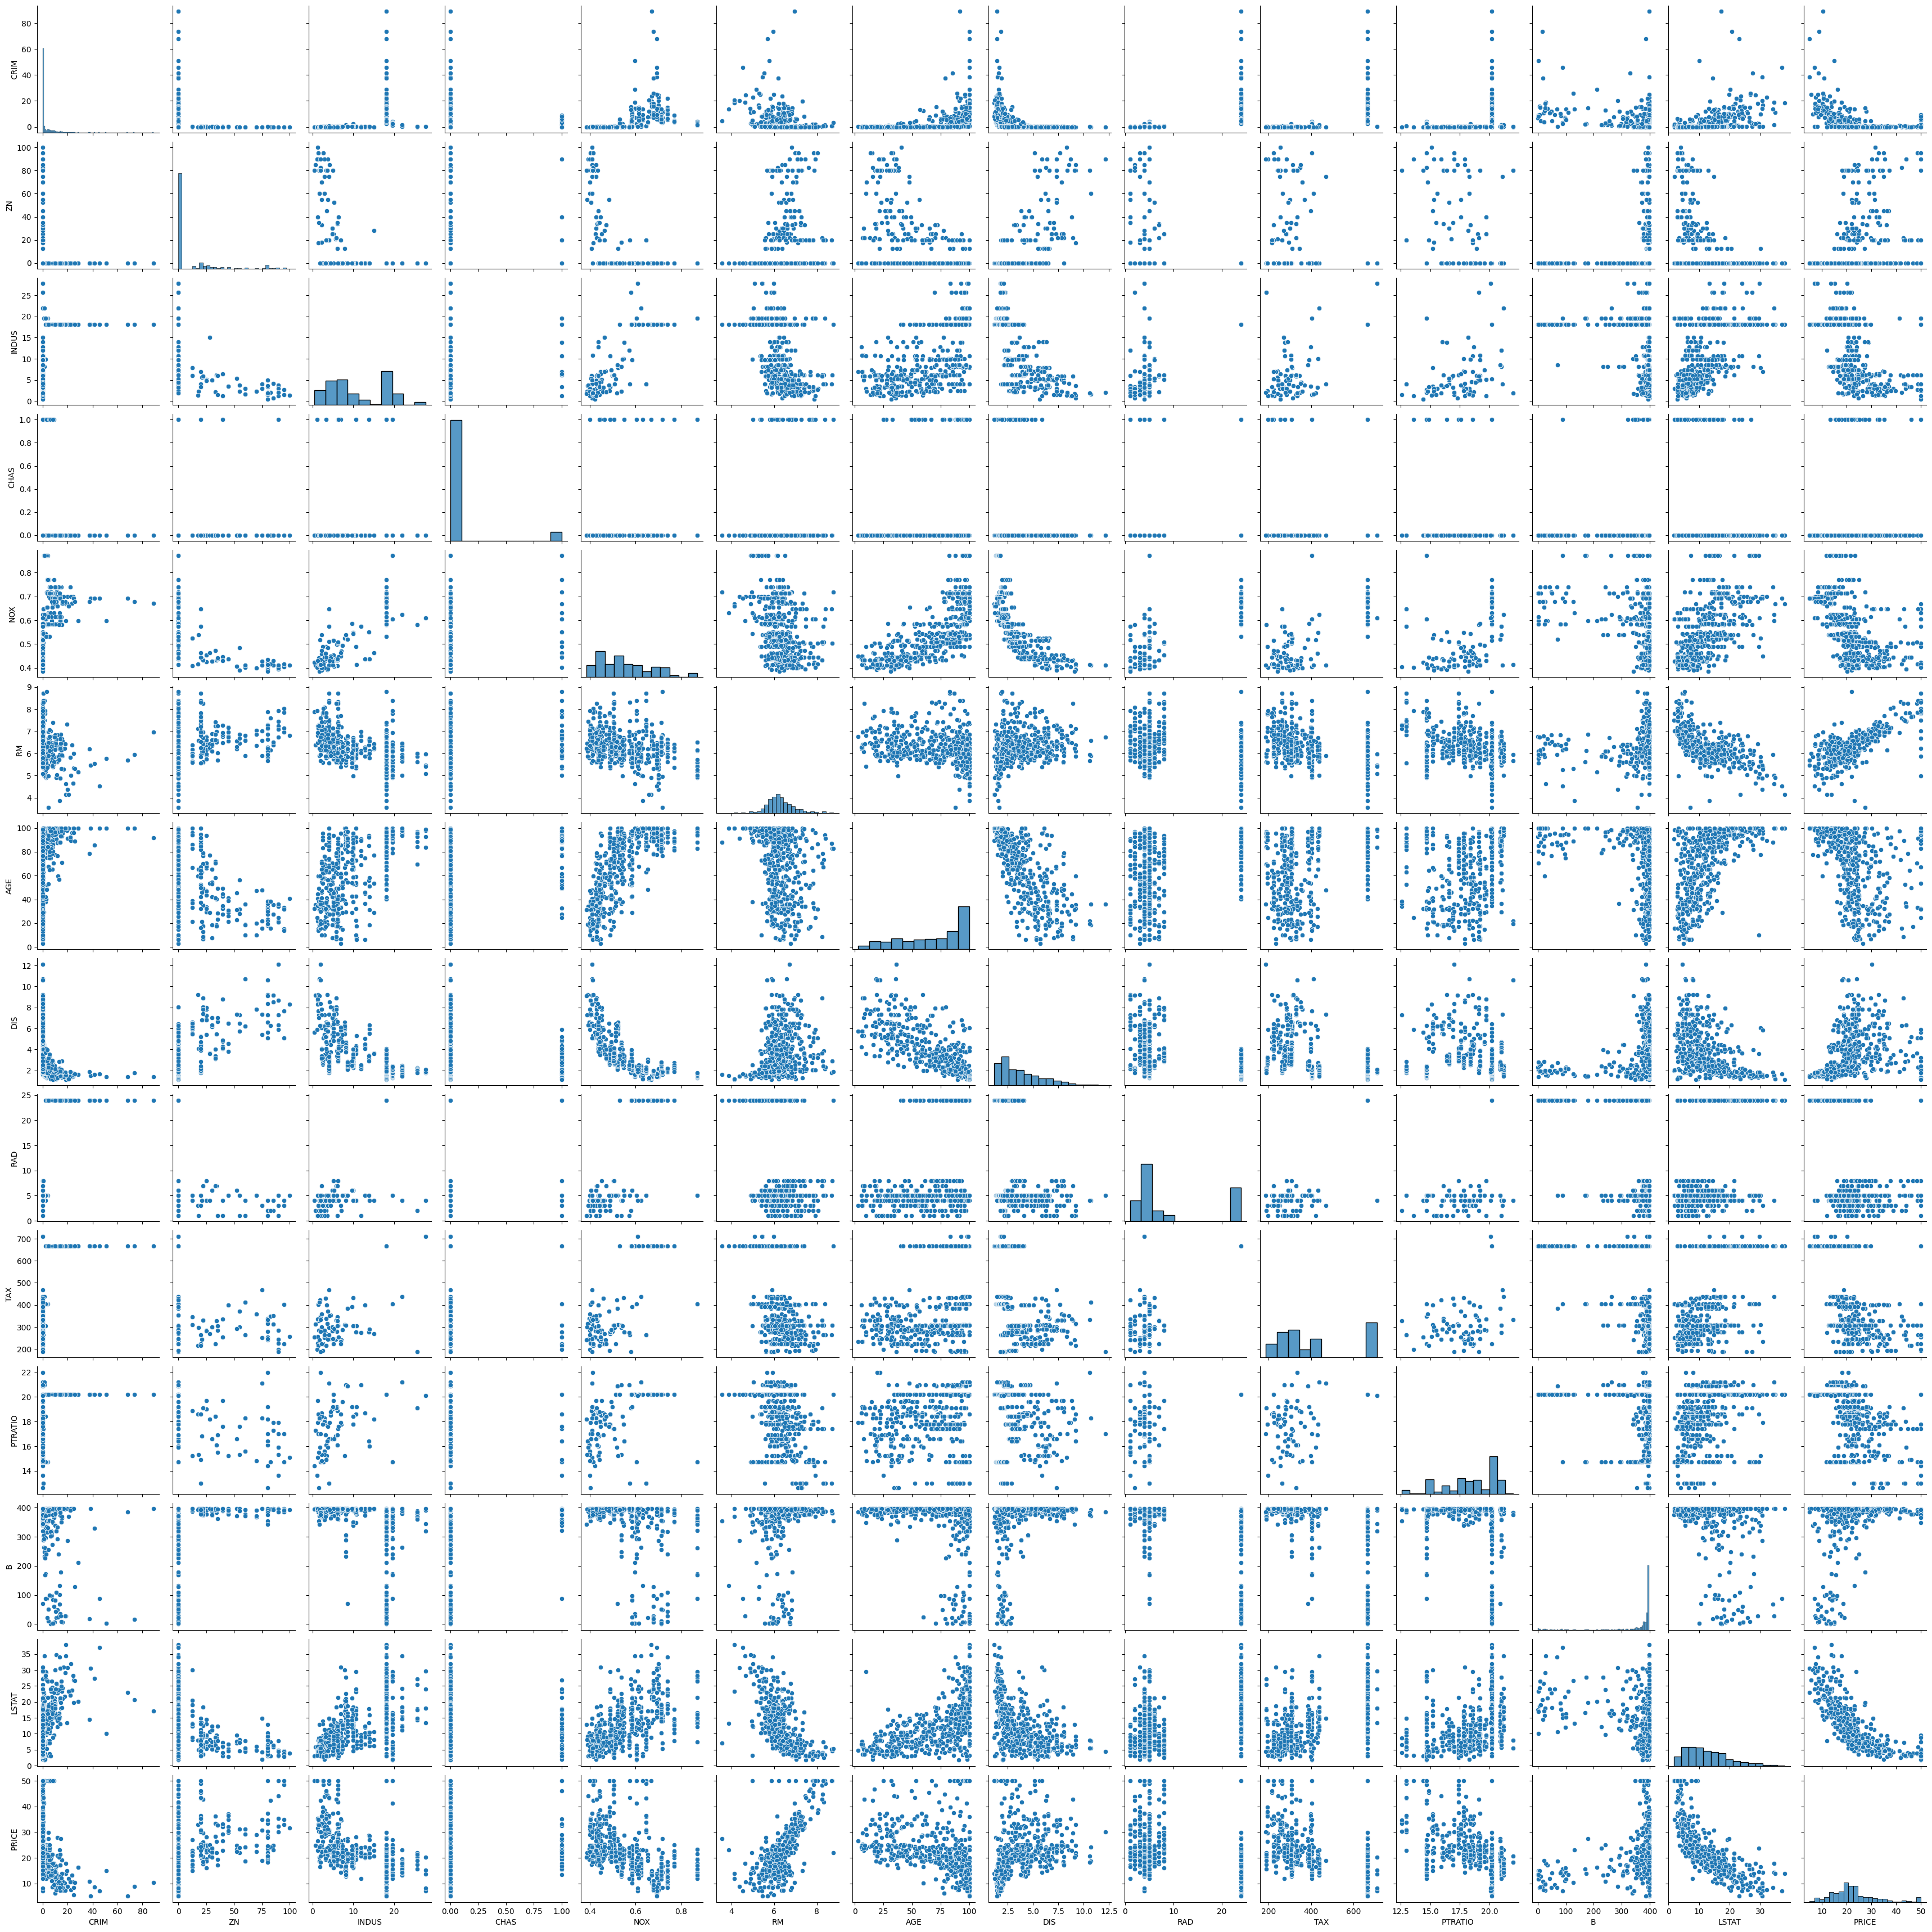

In [ ]:
sns.pairplot(df)
plt.show()

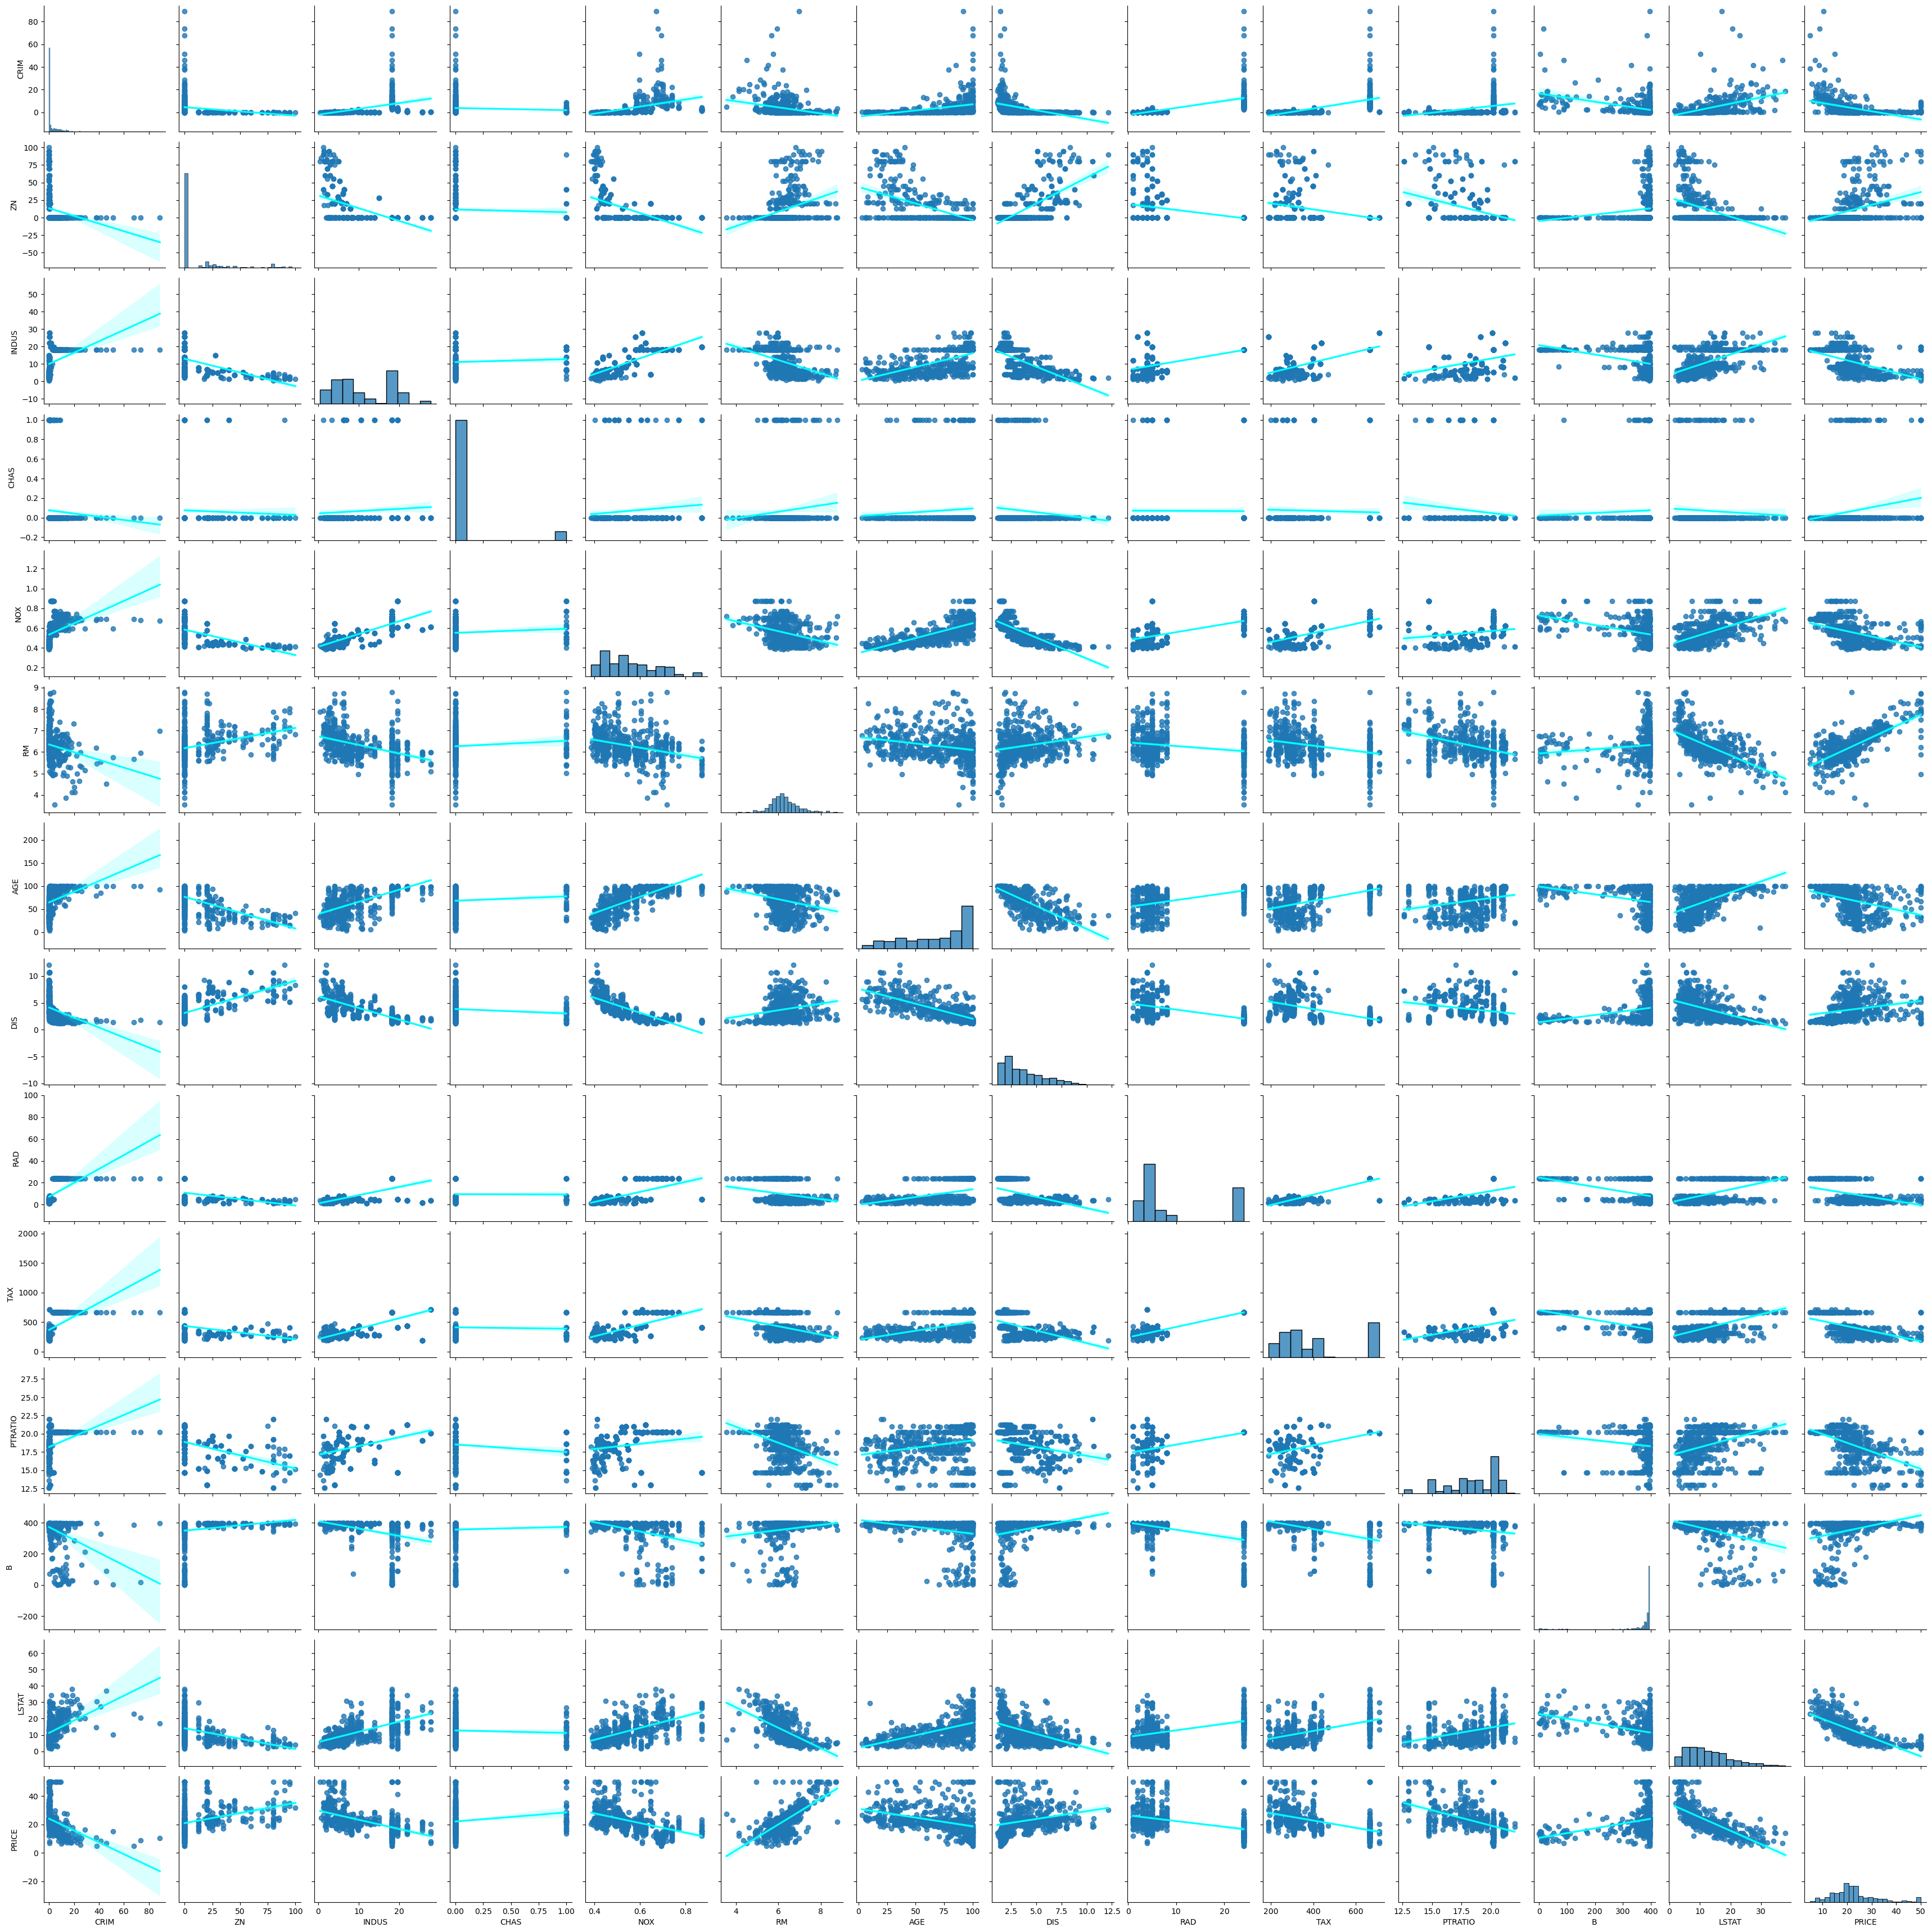

In [ ]:
# To include a regression line
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

In [ ]:
scatter_2 = px.scatter(df, 
                       x='PRICE', 
                       y='CRIM', 
                       color='RM', 
                       color_continuous_scale='Viridis',
                       title='How Price and Crime are related')
scatter_2.show()

In [ ]:
scatter_3= px.scatter(df, 
                      x='PRICE', 
                      y='RM', 
                      color='CRIM', 
                      color_continuous_scale='Viridis',
                      title='How Room and Price and crime are related')
scatter_3.show()

# ------Machine Learning with pycaret-------

In [4]:
from pycaret.regression import setup, models

# Setup the environment with the dataset
exp = setup(df, target='PRICE', verbose=True, session_id=5621)

# List all available regression models
available_models = models()

# Display the available models
print(available_models)

                                       Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada          

In [5]:
from pycaret.regression import compare_models

# Compare all models and get the best performing one
best_model = compare_models()

Initiated  . . . . . . . . . . . . . . . . . .              19:19:51
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [6]:
from pycaret.regression import finalize_model

# Finalize the best model
final_gbr_model = finalize_model('gbr')

In [7]:
from pycaret.regression import evaluate_model

# Evaluate the finalized model
evaluate_model(final_gbr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
from pycaret.regression import get_config

# Access the X_test (test features) and y_test (test labels) and the seed/session_id from the setup
X_test = get_config('X_test')
y_test = get_config('y_test')
X_train = get_config('X_train')
y_train = get_config('y_train')
seed = get_config('seed')
print(f"seed: {seed}")
# Get the features to a list for FastAPI
print(get_config('X_train').columns.tolist())

seed: 5621
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [9]:
from pycaret.regression import predict_model

# Assuming 'new_data' is the unseen dataset
predictions = predict_model(final_gbr_model, data=X_test)

# Check the predictions
print(predictions.head())

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS   RAD    TAX  \
290  0.03502  80.0   4.95   0.0  0.411  6.861  27.900000  5.1167   4.0  245.0   
206  0.22969   0.0  10.59   0.0  0.489  6.326  52.500000  4.3549   4.0  277.0   
157  1.22358   0.0  19.58   0.0  0.605  6.943  97.400002  1.8773   5.0  403.0   
454  9.51363   0.0  18.10   0.0  0.713  6.728  94.099998  2.4961  24.0  666.0   
481  5.70818   0.0  18.10   0.0  0.532  6.750  74.900002  3.3317  24.0  666.0   

       PTRATIO           B      LSTAT  prediction_label  
290  19.200001  396.899994   3.330000         31.802028  
206  18.600000  394.869995  10.970000         23.179167  
157  14.700000  363.429993   4.590000         39.139725  
454  20.200001    6.680000  18.709999         13.250200  
481  20.200001  393.070007   7.740000         24.276890  


In [10]:
from pycaret.regression import save_model

# Save the final model
save_model(final_gbr_model, 'final_gbr_model')

# Optionally, save the predictions
predictions.to_csv('predictions.csv', index=False)

# Now, this model can be loaded anytime using load_model() in the future.

Transformation Pipeline and Model Successfully Saved


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from pycaret.regression import load_model # to load the saved model later:

# Load the model (for future inference or deployment)
loaded_model = load_model('final_gbr_model')

# Make predictions with the loaded model. predictions = predict_model(loaded_model, data=new_data)
predictions = predict_model(loaded_model, data=X_test)

# Get the predicted values (from the 'Label' column in the predictions DataFrame)
y_pred = predictions.prediction_label

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Transformation Pipeline and Model Successfully Loaded


RMSE: 1.4887346209680228
R²: 0.9704847697988341


In [12]:
# Creating DataFrame 
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_pred
})

# Create a Plotly scatter plot to compare true vs predicted values
fig = px.scatter(comparison_df, x='True Values', y='Predicted Values', 
                 title='True vs Predicted Values', 
                 labels={'True Values': 'Actual Price', 'Predicted Values': 'Predicted Price'},
                 template='plotly_dark')

# Add a line y=x for visual reference
fig.add_scatter(x=comparison_df['True Values'], y=comparison_df['True Values'], mode='lines', name='y=x', line=dict(dash='dash', color='red'))

# Show the plot
fig.show()

# Compute and print the metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 1.4887346209680228
R²: 0.9704847697988341


In [13]:
# Calculate the mean of the true values (house prices)
mean_price = y_test.mean()

# Compute the relative RMSE as a percentage of the mean
relative_rmse = (rmse / mean_price) * 100

print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"This indicates that the model's average prediction error is {relative_rmse:.2f}% of the actual house price.")

Relative RMSE: 6.82%
This indicates that the model's average prediction error is 6.82% of the actual house price.


# ---------- TUNING THE MODEL ----------

In [14]:
from pycaret.regression import tune_model, save_model

# Tune the GBR model (this will automatically search for better hyperparameters)
tuned_gbr_model = tune_model(final_gbr_model)

# Finalize the tuned model
final_tuned_gbr_model = finalize_model(tuned_gbr_model)

# Save the tuned model
save_model(final_tuned_gbr_model, 'tuned_gbr_model')

evaluate_model(final_tuned_gbr_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Transformation Pipeline and Model Successfully Saved


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
X_train_tuned = get_config('X_train')
X_test_tuned = get_config('X_test')
y_train_tuned = get_config('y_train')
y_test_tuned = get_config('y_test')

In [16]:
# check the tuned model performance 

print(final_tuned_gbr_model)

from pycaret.regression import load_model

# Load the model (for future inference or deployment)
loaded_tuned_model = load_model('tuned_gbr_model')

# Make predictions with the loaded model. predictions = predict_model(loaded_model, data=new_data)
predictions_tuned = predict_model(loaded_tuned_model, data=X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Get the predicted values (from the 'Label' column in the predictions DataFrame)
y_tuned_pred = predictions_tuned.prediction_label

# Compute RMSE
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_tuned_pred))

# Compute R²
r2_tuned = r2_score(y_test, y_tuned_pred)

print(f"RMSE: {rmse_tuned}")
print(f"R²: {r2_tuned}")

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                             'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                             'TAX', 'PTRATIO', 'B', 'LSTAT'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 GradientBoostingRegressor(learning_rate=0.3, max_depth=11,
                                           max_features='sqrt',
                                           min_impurity_decrease=0.2,
                                           min_samples_leaf=3,
                                           min_samples_split=7,
                                           random_state=5621))])
Trans

RMSE: 0.3380998069804672
R²: 0.9984776958048756


In [17]:
# Tuning will optimize parameters like the number of trees, learning rate, and tree depth to potentially improve the model’s performance.

In [18]:
# Calculate the mean of the true values (house prices)
mean_price = y_test.mean()

# Compute the relative RMSE as a percentage of the mean
relative_rmse_tuned = (rmse_tuned / mean_price) * 100

print(f"Relative RMSE: {relative_rmse_tuned:.2f}%")
print(f"This indicates that the model's average prediction error is {relative_rmse_tuned:.2f}% of the actual house price.")

Relative RMSE: 1.55%
This indicates that the model's average prediction error is 1.55% of the actual house price.


In [19]:
# Load the previously trained and tuned model
model_re_saved = load_model('tuned_gbr_model')

# Save it again
import joblib
joblib.dump(model_re_saved, 'tuned_gbr_model.pkl')

Transformation Pipeline and Model Successfully Loaded


['tuned_gbr_model.pkl']

In [20]:
# Creating DataFrame for the original and tuned model predictions
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Original Model Predictions': y_pred,
    'Tuned Model Predictions': y_tuned_pred
})

# Create a Plotly scatter plot to compare true vs predicted values
fig = px.scatter(comparison_df, x='True Values', y='Original Model Predictions', 
                 title='True vs Predicted Values', 
                 labels={'True Values': 'Actual Price', 'Original Model Predictions': 'Predicted Price'},
                 template='plotly_dark')

# Add a scatter for the tuned model predictions
fig.add_scatter(x=comparison_df['True Values'], 
                y=comparison_df['Tuned Model Predictions'], 
                mode='markers', name='Tuned Model', marker=dict(color='red'))

# Add a line y=x for visual reference
fig.add_scatter(x=comparison_df['True Values'], 
                y=comparison_df['True Values'], 
                mode='lines', name='y=x', line=dict(dash='dash', color='red'))

# Show the plot
fig.show()

print(f"RMSE_tuned: {rmse_tuned:.3f}")
print(f"R²_tuned: {r2_tuned:.3f}")
print(f"Relative RMSE_tuned: {relative_rmse_tuned:.3f}%")

RMSE_tuned: 0.338
R²_tuned: 0.998
Relative RMSE_tuned: 1.548%


# Further Improvements: 

### `- log of features that are highly skewed`

In [21]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
PRICE      1.108098
dtype: float64

In [22]:
X_train_tuned

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS   RAD    TAX  \
110  0.10793   0.0   8.56   0.0  0.520  6.195  54.400002  2.7778   5.0  384.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675   1.0  273.0   
260  0.54011  20.0   3.97   0.0  0.647  7.203  81.800003  2.1121   5.0  264.0   
473  4.64689   0.0  18.10   0.0  0.614  6.980  67.599998  2.5329  24.0  666.0   
211  0.37578   0.0  10.59   1.0  0.489  5.404  88.599998  3.6650   4.0  277.0   
..       ...   ...    ...   ...    ...    ...        ...     ...   ...    ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.500000  2.3999   6.0  391.0   
342  0.02498   0.0   1.89   0.0  0.518  6.540  59.700001  6.2669   1.0  422.0   
70   0.08826   0.0  10.81   0.0  0.413  6.417   6.600000  5.2873   4.0  305.0   
430  8.49213   0.0  18.10   0.0  0.584  6.348  86.099998  2.0527  24.0  666.0   
93   0.02875  28.0  15.04   0.0  0.464  6.211  28.900000  3.6659   4.0  270.0   

       PTRATIO           B      LSTAT  
110  20.900000  393.489990  13.000000  
503  21.000000  396.899994   5.640000  
260  13.000000  392.799988   9.590000  
473  20.200001  374.679993  11.660000  
211  18.600000  395.239990  23.980000  
..         ...         ...        ...  
499  19.200001  395.769989  15.100000  
342  15.900000  389.959991   8.650000  
70   19.200001  383.730011   6.720000  
430  20.200001   83.449997  17.639999  
93   18.200001  396.329987   6.210000  

[354 rows x 13 columns]

In [23]:
X_train_tuned.skew()

CRIM       5.498484
ZN         2.219162
INDUS      0.321701
CHAS       3.366293
NOX        0.748476
RM         0.327468
AGE       -0.616340
DIS        0.898042
RAD        0.973800
TAX        0.657326
PTRATIO   -0.782052
B         -2.747979
LSTAT      0.881548
dtype: float32

In [24]:
X_train_tuned

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS   RAD    TAX  \
110  0.10793   0.0   8.56   0.0  0.520  6.195  54.400002  2.7778   5.0  384.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675   1.0  273.0   
260  0.54011  20.0   3.97   0.0  0.647  7.203  81.800003  2.1121   5.0  264.0   
473  4.64689   0.0  18.10   0.0  0.614  6.980  67.599998  2.5329  24.0  666.0   
211  0.37578   0.0  10.59   1.0  0.489  5.404  88.599998  3.6650   4.0  277.0   
..       ...   ...    ...   ...    ...    ...        ...     ...   ...    ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.500000  2.3999   6.0  391.0   
342  0.02498   0.0   1.89   0.0  0.518  6.540  59.700001  6.2669   1.0  422.0   
70   0.08826   0.0  10.81   0.0  0.413  6.417   6.600000  5.2873   4.0  305.0   
430  8.49213   0.0  18.10   0.0  0.584  6.348  86.099998  2.0527  24.0  666.0   
93   0.02875  28.0  15.04   0.0  0.464  6.211  28.900000  3.6659   4.0  270.0   

       PTRATIO           B      LSTAT  
110  20.900000  393.489990  13.000000  
503  21.000000  396.899994   5.640000  
260  13.000000  392.799988   9.590000  
473  20.200001  374.679993  11.660000  
211  18.600000  395.239990  23.980000  
..         ...         ...        ...  
499  19.200001  395.769989  15.100000  
342  15.900000  389.959991   8.650000  
70   19.200001  383.730011   6.720000  
430  20.200001   83.449997  17.639999  
93   18.200001  396.329987   6.210000  

[354 rows x 13 columns]

In [25]:
def log_transformation(data, features):
    for feature in features:
        if feature in data.columns:
            data[f'lg_{feature}'] = np.log(data[feature] +1)
    return data

log_transformed_X_train_tuned = log_transformation(X_train_tuned, ['CRIM','ZN','CHAS'])
log_transformed_X_train_tuned

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS   RAD    TAX  \
110  0.10793   0.0   8.56   0.0  0.520  6.195  54.400002  2.7778   5.0  384.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675   1.0  273.0   
260  0.54011  20.0   3.97   0.0  0.647  7.203  81.800003  2.1121   5.0  264.0   
473  4.64689   0.0  18.10   0.0  0.614  6.980  67.599998  2.5329  24.0  666.0   
211  0.37578   0.0  10.59   1.0  0.489  5.404  88.599998  3.6650   4.0  277.0   
..       ...   ...    ...   ...    ...    ...        ...     ...   ...    ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.500000  2.3999   6.0  391.0   
342  0.02498   0.0   1.89   0.0  0.518  6.540  59.700001  6.2669   1.0  422.0   
70   0.08826   0.0  10.81   0.0  0.413  6.417   6.600000  5.2873   4.0  305.0   
430  8.49213   0.0  18.10   0.0  0.584  6.348  86.099998  2.0527  24.0  666.0   
93   0.02875  28.0  15.04   0.0  0.464  6.211  28.900000  3.6659   4.0  270.0   

       PTRATIO           B      LSTAT   lg_CRIM     lg_ZN   lg_CHAS  
110  20.900000  393.489990  13.000000  0.102493  0.000000  0.000000  
503  21.000000  396.899994   5.640000  0.058986  0.000000  0.000000  
260  13.000000  392.799988   9.590000  0.431854  3.044523  0.000000  
473  20.200001  374.679993  11.660000  1.731105  0.000000  0.000000  
211  18.600000  395.239990  23.980000  0.319021  0.000000  0.693147  
..         ...         ...        ...       ...       ...       ...  
499  19.200001  395.769989  15.100000  0.163674  0.000000  0.000000  
342  15.900000  389.959991   8.650000  0.024673  0.000000  0.000000  
70   19.200001  383.730011   6.720000  0.084580  0.000000  0.000000  
430  20.200001   83.449997  17.639999  2.250463  0.000000  0.000000  
93   18.200001  396.329987   6.210000  0.028344  3.367296  0.000000  

[354 rows x 16 columns]

In [26]:
# apply the log transformation to X_test_tuned
log_transf_X_test_tuned = log_transformation(X_test_tuned, ['CRIM','ZN','CHAS'])
log_transf_X_test_tuned

CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS   RAD  \
290   0.035020  80.0   4.95   0.0  0.411  6.861   27.900000  5.1167   4.0   
206   0.229690   0.0  10.59   0.0  0.489  6.326   52.500000  4.3549   4.0   
157   1.223580   0.0  19.58   0.0  0.605  6.943   97.400002  1.8773   5.0   
454   9.513630   0.0  18.10   0.0  0.713  6.728   94.099998  2.4961  24.0   
481   5.708180   0.0  18.10   0.0  0.532  6.750   74.900002  3.3317  24.0   
..         ...   ...    ...   ...    ...    ...         ...     ...   ...   
476   4.871410   0.0  18.10   0.0  0.614  6.484   93.599998  2.3053  24.0   
368   4.898220   0.0  18.10   0.0  0.631  4.970  100.000000  1.3325  24.0   
429   9.338890   0.0  18.10   0.0  0.679  6.380   95.599998  1.9682  24.0   
103   0.211610   0.0   8.56   0.0  0.520  6.137   87.400002  2.7147   5.0   
403  24.801701   0.0  18.10   0.0  0.693  5.349   96.000000  1.7028  24.0   

       TAX    PTRATIO           B      LSTAT   lg_CRIM     lg_ZN  lg_CHAS  
290  245.0  19.200001  396.899994   3.330000  0.034421  4.394449      0.0  
206  277.0  18.600000  394.869995  10.970000  0.206762  0.000000      0.0  
157  403.0  14.700000  363.429993   4.590000  0.799118  0.000000      0.0  
454  666.0  20.200001    6.680000  18.709999  2.352673  0.000000      0.0  
481  666.0  20.200001  393.070007   7.740000  1.903328  0.000000      0.0  
..     ...        ...         ...        ...       ...       ...      ...  
476  666.0  20.200001  396.209991  18.680000  1.770095  0.000000      0.0  
368  666.0  20.200001  375.519989   3.260000  1.774651  0.000000      0.0  
429  666.0  20.200001   60.720001  24.080000  2.335912  0.000000      0.0  
103  384.0  20.900000  394.470001  13.440000  0.191950  0.000000      0.0  
403  666.0  20.200001  396.899994  19.770000  3.250440  0.000000      0.0  

[152 rows x 16 columns]

In [27]:
frames = [log_transformed_X_train_tuned, log_transf_X_test_tuned]
data_transformed = pd.concat(frames)
assert data_transformed.shape == (506,16) #verify the shape is as expected: (506,16)

In [28]:
data_transformed

CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS   RAD  \
110   0.107930   0.0   8.56   0.0  0.520  6.195   54.400002  2.7778   5.0   
503   0.060760   0.0  11.93   0.0  0.573  6.976   91.000000  2.1675   1.0   
260   0.540110  20.0   3.97   0.0  0.647  7.203   81.800003  2.1121   5.0   
473   4.646890   0.0  18.10   0.0  0.614  6.980   67.599998  2.5329  24.0   
211   0.375780   0.0  10.59   1.0  0.489  5.404   88.599998  3.6650   4.0   
..         ...   ...    ...   ...    ...    ...         ...     ...   ...   
476   4.871410   0.0  18.10   0.0  0.614  6.484   93.599998  2.3053  24.0   
368   4.898220   0.0  18.10   0.0  0.631  4.970  100.000000  1.3325  24.0   
429   9.338890   0.0  18.10   0.0  0.679  6.380   95.599998  1.9682  24.0   
103   0.211610   0.0   8.56   0.0  0.520  6.137   87.400002  2.7147   5.0   
403  24.801701   0.0  18.10   0.0  0.693  5.349   96.000000  1.7028  24.0   

       TAX    PTRATIO           B  LSTAT   lg_CRIM     lg_ZN   lg_CHAS  
110  384.0  20.900000  393.489990  13.00  0.102493  0.000000  0.000000  
503  273.0  21.000000  396.899994   5.64  0.058986  0.000000  0.000000  
260  264.0  13.000000  392.799988   9.59  0.431854  3.044523  0.000000  
473  666.0  20.200001  374.679993  11.66  1.731105  0.000000  0.000000  
211  277.0  18.600000  395.239990  23.98  0.319021  0.000000  0.693147  
..     ...        ...         ...    ...       ...       ...       ...  
476  666.0  20.200001  396.209991  18.68  1.770095  0.000000  0.000000  
368  666.0  20.200001  375.519989   3.26  1.774651  0.000000  0.000000  
429  666.0  20.200001   60.720001  24.08  2.335912  0.000000  0.000000  
103  384.0  20.900000  394.470001  13.44  0.191950  0.000000  0.000000  
403  666.0  20.200001  396.899994  19.77  3.250440  0.000000  0.000000  

[506 rows x 16 columns]

In [29]:
# log transf of y_train_tuned
train_target_transf = np.log(y_train_tuned)

In [30]:
# log transf of y_test_tuned
test_target_transf = np.log(y_test_tuned)

In [31]:
target_frames = [train_target_transf, test_target_transf]
data_transformed['log_PRICE'] = pd.concat(target_frames)

In [32]:
assert data_transformed.shape == (506,17)

In [33]:
data_transformed

CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS   RAD  \
110   0.107930   0.0   8.56   0.0  0.520  6.195   54.400002  2.7778   5.0   
503   0.060760   0.0  11.93   0.0  0.573  6.976   91.000000  2.1675   1.0   
260   0.540110  20.0   3.97   0.0  0.647  7.203   81.800003  2.1121   5.0   
473   4.646890   0.0  18.10   0.0  0.614  6.980   67.599998  2.5329  24.0   
211   0.375780   0.0  10.59   1.0  0.489  5.404   88.599998  3.6650   4.0   
..         ...   ...    ...   ...    ...    ...         ...     ...   ...   
476   4.871410   0.0  18.10   0.0  0.614  6.484   93.599998  2.3053  24.0   
368   4.898220   0.0  18.10   0.0  0.631  4.970  100.000000  1.3325  24.0   
429   9.338890   0.0  18.10   0.0  0.679  6.380   95.599998  1.9682  24.0   
103   0.211610   0.0   8.56   0.0  0.520  6.137   87.400002  2.7147   5.0   
403  24.801701   0.0  18.10   0.0  0.693  5.349   96.000000  1.7028  24.0   

       TAX    PTRATIO           B  LSTAT   lg_CRIM     lg_ZN   lg_CHAS  \
110  384.0  20.900000  393.489990  13.00  0.102493  0.000000  0.000000   
503  273.0  21.000000  396.899994   5.64  0.058986  0.000000  0.000000   
260  264.0  13.000000  392.799988   9.59  0.431854  3.044523  0.000000   
473  666.0  20.200001  374.679993  11.66  1.731105  0.000000  0.000000   
211  277.0  18.600000  395.239990  23.98  0.319021  0.000000  0.693147   
..     ...        ...         ...    ...       ...       ...       ...   
476  666.0  20.200001  396.209991  18.68  1.770095  0.000000  0.000000   
368  666.0  20.200001  375.519989   3.26  1.774651  0.000000  0.000000   
429  666.0  20.200001   60.720001  24.08  2.335912  0.000000  0.000000   
103  384.0  20.900000  394.470001  13.44  0.191950  0.000000  0.000000   
403  666.0  20.200001  396.899994  19.77  3.250440  0.000000  0.000000   

     log_PRICE  
110   3.077312  
503   3.173878  
260   3.520461  
473   3.394508  
211   2.960105  
..         ...  
476   2.815409  
368   3.912023  
429   2.251292  
103   2.960105  
403   2.116256  

[506 rows x 17 columns]

In [34]:
exp_lt = setup(data = data_transformed,
               target = 'log_PRICE',
               transformation=False,
               verbose=True,
               session_id=5621,
               ignore_features=['CRIM', 'ZN', 'CHAS'])

In [35]:
best_model_lt = compare_models() 

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [36]:
from pycaret.regression import create_model
log_transf_model = create_model(best_model_lt)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
evaluate_model(log_transf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
tuned_log_transf = tune_model(log_transf_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
final_log_transf_model = finalize_model(tuned_log_transf)

In [40]:
X_train_logt_tuned = get_config('X_train')
X_test_logt_tuned = get_config('X_test')
y_train_logt_tuned = get_config('y_train')
y_test_logt_tuned = get_config('y_test')

In [41]:
predictions_logt_tuned = predict_model(final_log_transf_model, data=X_test_logt_tuned)

In [42]:
y_logt_tuned_pred = predictions_logt_tuned.prediction_label

In [43]:
# predictions are log transformed so now to exp() to convert them 
y_logt_tuned_pred_exp = np.exp(y_logt_tuned_pred)

# test target also
y_test_logt_tuned_exp = np.exp(y_test_logt_tuned)

In [44]:
# Compute RMSE
rmse_logt_tuned = np.sqrt(mean_squared_error(y_test_logt_tuned_exp, y_logt_tuned_pred_exp))

# Compute R²
r2_logt_tuned = r2_score(y_test_logt_tuned_exp, y_logt_tuned_pred_exp)

print(f"RMSE: {rmse_logt_tuned}")
print(f"R²: {r2_logt_tuned}")

RMSE: 1.1309862825062282e-06
R²: 0.9999999999999828


    Check over-fitting

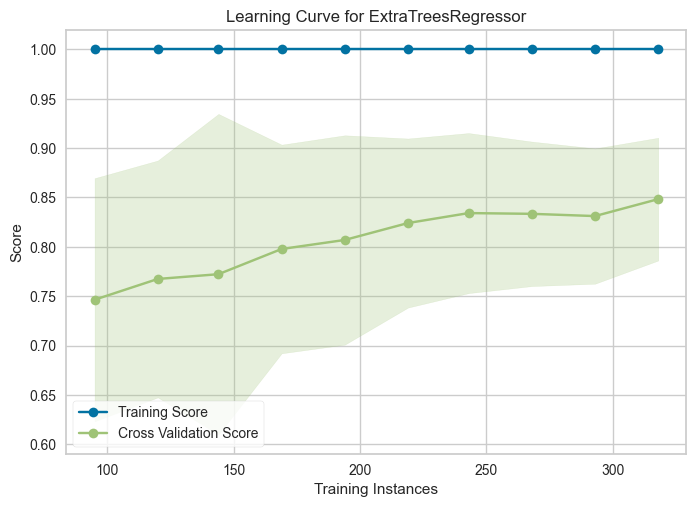

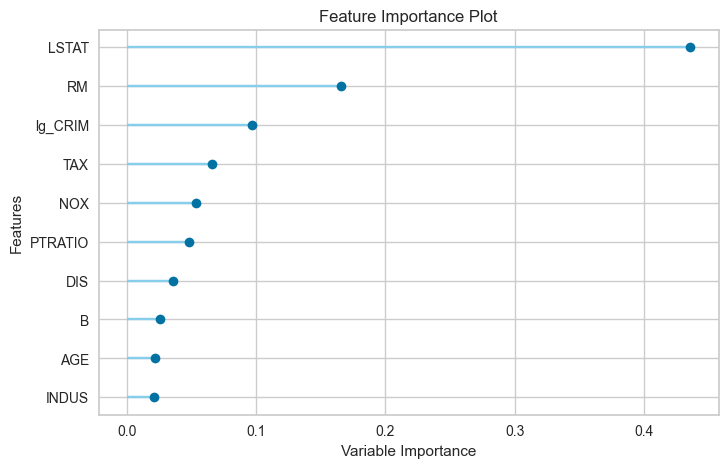

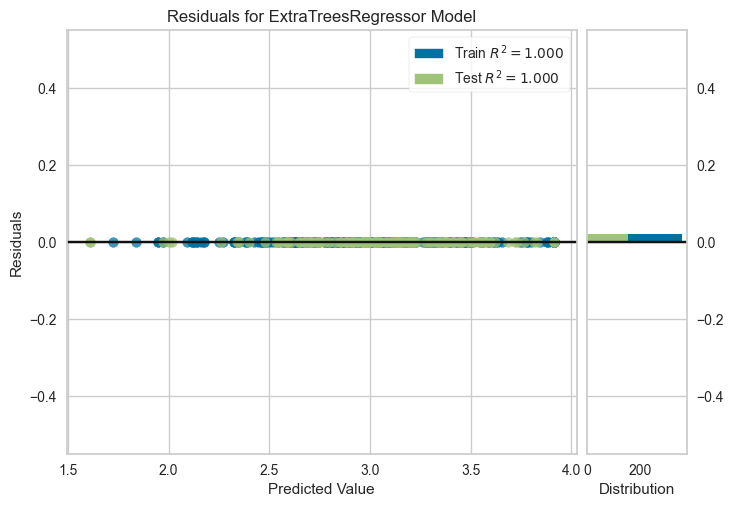

In [46]:
from pycaret.regression import plot_model

# Plot the learning curve to assess overfitting
plot_model(final_log_transf_model, plot='learning')

# Plot feature importance to check how the model is relying on features
plot_model(final_log_transf_model, plot='feature')

# Plot residuals to check for patterns or overfitting
plot_model(final_log_transf_model, plot='residuals')

In [47]:
# Define X as all columns except the target column ('log_PRICE')
X = data_transformed.drop(columns=['log_PRICE'])

# Define y as the target column ('log_PRICE')
y = data_transformed['log_PRICE']

In [48]:
from sklearn.model_selection import cross_val_score

# Assuming 'final_model' is your trained model (e.g., GradientBoostingRegressor)
# X and y are already defined as the feature set and target variable
cv_scores = cross_val_score(final_log_transf_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE for better interpretability
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of RMSE
print(f"10-fold CV RMSE mean: {np.mean(rmse_scores)}")
print(f"10-fold CV RMSE std: {np.std(rmse_scores)}")


10-fold CV RMSE mean: 0.1413734975845525
10-fold CV RMSE std: 0.018900034919894195


### Good Mean RMSE:

    The mean RMSE of 0.141 is relatively low, which suggests that, on average, the model's predictions are close to the actual values (log-transformed). Since RMSE is in the same units as the target, this means the model is doing well at predicting the log-transformed target price.

### Low Standard Deviation:

    The standard deviation of 0.019 is also quite small, which indicates that the model's performance is stable across the 10 different folds. It suggests that the model is not overfitting and is able to generalize well across different subsets of the data.

In [50]:
rmse_scores_original_scale = np.exp(np.mean(rmse_scores)) - 1

print(f"10-fold CV RMSE mean (original scale): {rmse_scores_original_scale}")

10-fold CV RMSE mean (original scale): 0.15185478263168628


In [51]:
mean_price = np.mean(np.exp(y))  # Exponentiate y to get the mean of the original price scale
relative_rmse = rmse_scores_original_scale / mean_price
print(f"Relative RMSE: {relative_rmse * 100:.2f}%")

Relative RMSE: 0.67%


In [52]:
from pycaret.regression import save_model

# Save the model to a file (e.g., 'final_model')
save_model(final_log_transf_model, 'final_log_transf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['INDUS', 'NOX', 'RM', 'AGE', 'DIS',
                                              'RAD', 'TAX', 'PTRATIO', 'B',
                                              'LSTAT', 'lg_CRIM', 'lg_ZN',
                                              'lg_CHAS'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=5621))]),
 'final_log_transf_model.pkl')